In [1]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice

pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.lines as mlines
import seaborn as sb

import networkx as nx
from scipy import stats

Coded by Brian Keegan

In [2]:
terp_colors = {'tot_nerolidol_ct': '#00f6fa',
               'caryophyllene': '#aa0061',
               'linalool': '#5c068c',
               'terpinolene': '#ff671f',
               'g_terpinene': '#c27d5d',
               'a_terpinene': '#8a5942',
               'camphene': '#93a168',
               'bisabolol': '#af91b3',
               'limonene': '#eedc00',
               'myrcene': '#06038d',
               'tot_ocimene': '#e0004d',
               'a_pinene': '#00af66',
               'b_pinene': '#81b59f',
               'humulene': '#97d700',
               'other': '#8a8a8a'}

In [4]:
norm_lab_df = pd.read_csv('data/normed_thc_dom_kmeans_20220218_nl.csv',
                          dtype={'anon_producer':str})
norm_lab_df.head()

,u_id,strain_slug,anon_producer,product_category,strain_category,strain_popularity,chemotype,has_cannabs,chemotype_ratio,tot_thc,tot_cbd,tot_cbg,tot_cbc,tot_cbn,tot_thcv,has_terps,total_terps,terp_var,top_terp_f,tot_ocimene,camphene,g_terpinene,tot_nerolidol_ct,humulene,caryophyllene,limonene,linalool,myrcene,bisabolol,b_pinene,a_terpinene,terpinolene,a_pinene,total_cannabs,0,1,2,kmeans_label
0,0,NaN,1046,FLOWER,None,NaN,THC-Dom,True,425.819531,20.103098,0.047210,1.097430,0.000000,0.0,0.255775,True,2.042793,0.020911,caryophyllene,12.662660,0.504063,0.772360,0.504063,10.939076,28.261919,8.024423,1.652116,8.925542,1.491895,5.759003,0.504063,16.196055,3.802760,21.503513,-14.979183,14.802094,-11.438763,A
1,1,NaN,1046,FLOWER,None,NaN,THC-Dom,True,207.384250,17.775078,0.085711,0.904467,0.046734,0.0,0.050000,True,1.802569,0.015647,tot_ocimene,21.573197,0.575805,0.868247,1.279186,8.256073,18.156638,7.324038,0.575805,11.502369,0.575805,4.022542,0.733066,21.049403,3.507825,18.861990,-8.385474,23.612392,-5.376943,C
2,2,NaN,1046,FLOWER,None,NaN,THC-Dom,True,230.122927,18.196924,0.079075,0.923358,0.056123,0.0,0.050000,True,1.657769,0.013292,terpinolene,20.818946,0.621992,0.814187,1.662612,8.730714,19.036137,6.908567,1.372195,11.044578,0.621992,3.600342,0.745225,20.950313,3.072201,19.305480,-9.199292,23.203572,-6.334019,C
3,3,NaN,1046,FLOWER,None,NaN,THC-Dom,True,321.904704,19.302718,0.059964,0.517679,0.034465,0.0,0.050000,True,1.247020,0.013983,caryophyllene,0.801912,0.801912,0.801912,0.000000,13.442350,30.898123,10.815553,4.494519,29.554248,3.917273,2.863738,0.000000,0.000000,1.608460,19.964826,0.081314,-8.810710,-13.409729,A
4,4,NaN,1046,FLOWER,None,NaN,THC-Dom,True,253.209507,18.224250,0.071973,0.966903,0.000000,0.0,0.231606,True,1.262112,0.006794,caryophyllene,12.974428,0.817678,1.145827,0.817678,10.433612,25.984759,9.490993,2.399899,8.129213,0.817678,6.839238,0.817678,14.716595,4.614722,19.494732,-15.104463,14.293056,-8.468231,A


In [5]:
cannabinoid_cols = lab_df.columns[11:33]

# tot_can_cols = ['tot_cbc', 'tot_cbd', 'tot_cbdv', 'tot_cbg', 'tot_cbn', 'tot_cbt', 'tot_d8_thc', 'tot_thc', 'tot_thcv']
tot_can_cols = ['tot_thc','tot_cbd','tot_cbg','tot_cbc','tot_cbn','tot_thcv']

tot_terp_cols = ['tot_ocimene', 'bisabolol', 'g_terpinene', 'tot_nerolidol_ct','humulene',
                 'caryophyllene', 'limonene', 'linalool', 'camphene', 'myrcene', 'b_pinene',
                 'a_terpinene', 'terpinolene', 'a_pinene']

## Figure 2

In [12]:
def pearson_sig_string(s1,s2):
    _r,_p = stats.pearsonr(s1.fillna(0),s2.fillna(0))
    if _p < 0.001:
        return 'r={0:.2f}***'.format(_r)
    elif _p < 0.01:
        return 'r={0:.2f}**'.format(_r)
    elif _p < 0.05:
        return 'r={0:.2f}*'.format(_r)
    else:
        return 'r={0:.2f}'.format(_r)
    
def spearman_sig_string(s1,s2):
    _r,_p = stats.spearmanr(s1.fillna(0),s2.fillna(0))
    if _p < 0.001:
        return 'r={0:.2f}***'.format(_r)
    elif _p < 0.01:
        return 'r={0:.2f}**'.format(_r)
    elif _p < 0.05:
        return 'r={0:.2f}*'.format(_r)
    else:
        return 'r={0:.2f}'.format(_r)

In [13]:
lab_df['chemotype'].value_counts()

THC-Dom        86740
Bal THC/CBD     1940
CBD-Dom         1243
Name: chemotype, dtype: int64

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

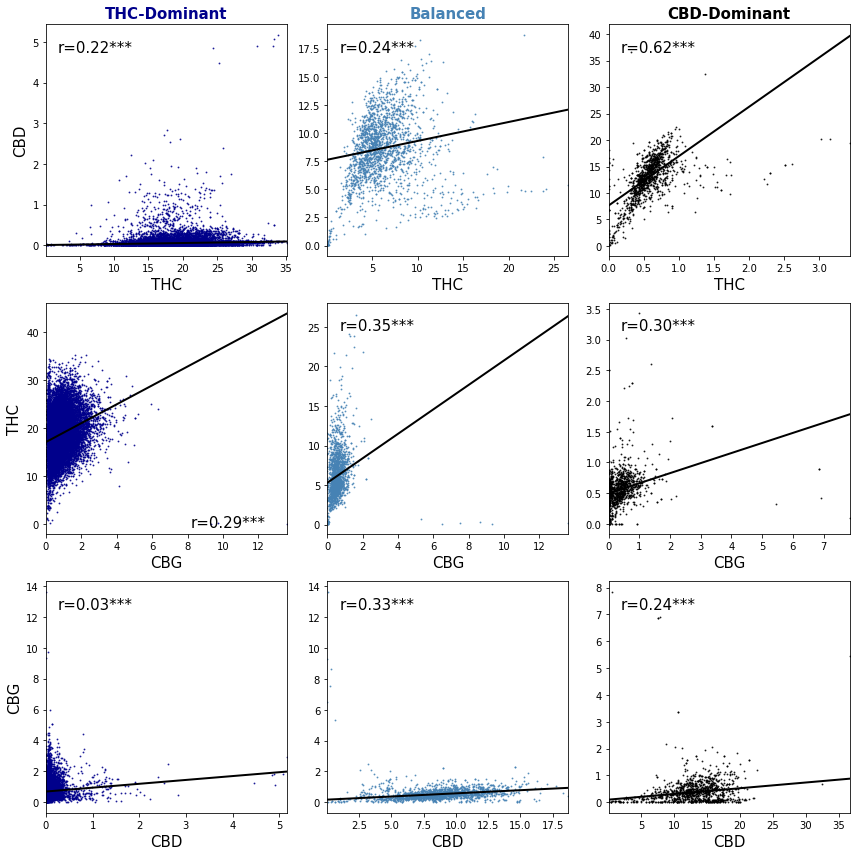

In [14]:
f,axs = plt.subplots(3,3,figsize=(12,12))

_lowess = False
_robust = True
_ci = 0 
_size = 3

# THC-Dom
_df = lab_df[['tot_thc','tot_cbd','tot_cbg','chemotype']].query("chemotype=='THC-Dom'")# & tot_cbg < 5 & tot_cbd < 20")
_df_samp = _df.sample(frac=.25)
sb.regplot(x='tot_thc',y='tot_cbd',data=_df_samp,marker='.',color='darkblue',scatter_kws={'s':_size},line_kws={'color':'k','linewidth':2},lowess=_lowess,robust=_robust,ci=_ci,ax=axs[0,0])
sb.regplot(x='tot_cbg',y='tot_thc',data=_df_samp,marker='.',color='darkblue',scatter_kws={'s':_size},line_kws={'color':'k','linewidth':2},lowess=_lowess,robust=_robust,ci=_ci,ax=axs[1,0])
sb.regplot(x='tot_cbd',y='tot_cbg',data=_df_samp,marker='.',color='darkblue',scatter_kws={'s':_size},line_kws={'color':'k','linewidth':2},lowess=_lowess,robust=_robust,ci=_ci,ax=axs[2,0])

axs[0,0].text(0.05,0.9,spearman_sig_string(_df['tot_thc'],_df['tot_cbd']),ha='left',va='center',transform=axs[0,0].transAxes,fontsize=15)
axs[1,0].text(0.6,0.05,spearman_sig_string(_df['tot_cbg'],_df['tot_thc']),ha='left',va='center',transform=axs[1,0].transAxes,fontsize=15)
axs[2,0].text(0.05,0.9,spearman_sig_string(_df['tot_cbd'],_df['tot_cbg']),ha='left',va='center',transform=axs[2,0].transAxes,fontsize=15)

# Balanced
_df = lab_df[['tot_thc','tot_cbd','tot_cbg','chemotype']].query("chemotype=='Bal THC/CBD'")# & tot_cbg < 5 & tot_cbd < 20")
_df_samp = _df.sample(frac=.25)
sb.regplot(x='tot_thc',y='tot_cbd',data=_df,marker='.',color='steelblue',scatter_kws={'s':_size},line_kws={'color':'k','linewidth':2},lowess=_lowess,robust=_robust,ci=_ci,ax=axs[0,1])
sb.regplot(x='tot_cbg',y='tot_thc',data=_df,marker='.',color='steelblue',scatter_kws={'s':_size},line_kws={'color':'k','linewidth':2},lowess=_lowess,robust=_robust,ci=_ci,ax=axs[1,1])
sb.regplot(x='tot_cbd',y='tot_cbg',data=_df,marker='.',color='steelblue',scatter_kws={'s':_size},line_kws={'color':'k','linewidth':2},lowess=_lowess,robust=_robust,ci=_ci,ax=axs[2,1])

axs[0,1].text(0.05,0.9,spearman_sig_string(_df['tot_thc'],_df['tot_cbd']),ha='left',va='center',transform=axs[0,1].transAxes,fontsize=15)
axs[1,1].text(0.05,0.9,spearman_sig_string(_df['tot_cbg'],_df['tot_thc']),ha='left',va='center',transform=axs[1,1].transAxes,fontsize=15)
axs[2,1].text(0.05,0.9,spearman_sig_string(_df['tot_cbd'],_df['tot_cbg']),ha='left',va='center',transform=axs[2,1].transAxes,fontsize=15)

# CBD-Dom
_df = lab_df[['tot_thc','tot_cbd','tot_cbg','chemotype']].query("chemotype=='CBD-Dom'")# & tot_cbg < 5 & tot_cbd < 20")
_df_samp = _df.sample(frac=.25)
sb.regplot(x='tot_thc',y='tot_cbd',data=_df,marker='.',color='black',scatter_kws={'s':_size},line_kws={'color':'k','linewidth':2},lowess=_lowess,robust=_robust,ci=_ci,ax=axs[0,2])
sb.regplot(x='tot_cbg',y='tot_thc',data=_df,marker='.',color='black',scatter_kws={'s':_size},line_kws={'color':'k','linewidth':2},lowess=_lowess,robust=_robust,ci=_ci,ax=axs[1,2])
sb.regplot(x='tot_cbd',y='tot_cbg',data=_df,marker='.',color='black',scatter_kws={'s':_size},line_kws={'color':'k','linewidth':2},lowess=_lowess,robust=_robust,ci=_ci,ax=axs[2,2])

axs[0,2].text(0.05,0.9,spearman_sig_string(_df['tot_thc'],_df['tot_cbd']),ha='left',va='center',transform=axs[0,2].transAxes,fontsize=15)
axs[1,2].text(0.05,0.9,spearman_sig_string(_df['tot_cbg'],_df['tot_thc']),ha='left',va='center',transform=axs[1,2].transAxes,fontsize=15)
axs[2,2].text(0.05,0.9,spearman_sig_string(_df['tot_cbd'],_df['tot_cbg']),ha='left',va='center',transform=axs[2,2].transAxes,fontsize=15)

# Label axes
axs[0,0].set_ylabel('CBD',fontsize=15)
axs[1,0].set_ylabel('THC',fontsize=15)
axs[2,0].set_ylabel('CBG',fontsize=15)

axs[2,0].set_xlabel('CBD',fontsize=15)
axs[2,1].set_xlabel('THC',fontsize=15)
axs[2,2].set_xlabel('CBG',fontsize=15)

for ax in axs[0,:]:
    ax.set_xlabel('THC',fontsize=15)
    
for ax in axs[1,:]:
    ax.set_xlabel('CBG',fontsize=15)
    
for ax in axs[2,:]:
    ax.set_xlabel('CBD',fontsize=15)
    
for ax in axs[:,1:].flatten():
    ax.set_ylabel(None)

axs[0,0].set_title('THC-Dominant',color='darkblue',fontsize=15,fontweight='bold')
axs[0,1].set_title('Balanced',color='steelblue',fontsize=15,fontweight='bold')
axs[0,2].set_title('CBD-Dominant',color='black',fontsize=15,fontweight='bold')

f.tight_layout()
f.savefig('cannabinoid_correlation.png',dpi=300)
f.savefig('cannabinoid_correlation.eps',dpi=300)
f.savefig('cannabinoid_correlation.pdf',dpi=300)

## Figure 4

### Clustermaps

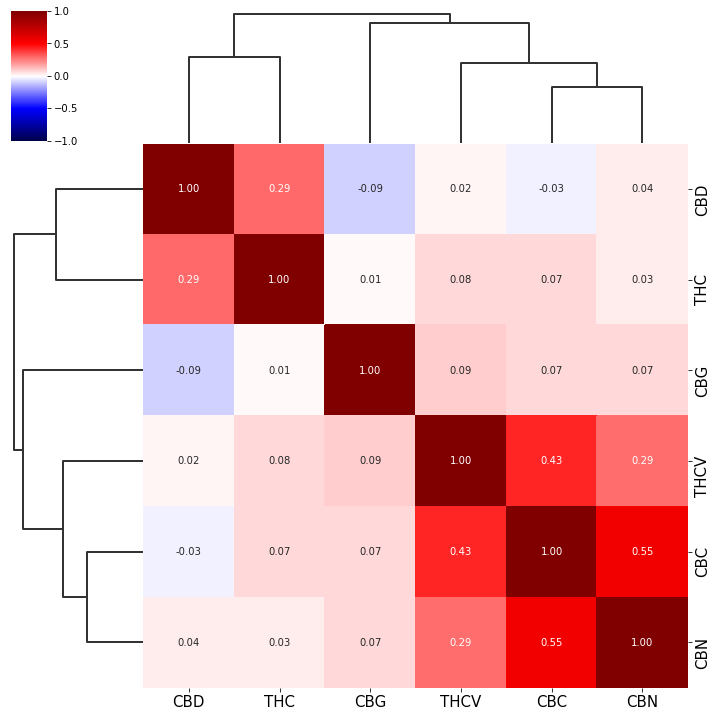

In [8]:
_df = lab_df[tot_can_cols].corr(method='spearman').fillna(0)

# _mask = np.zeros(_df.shape, bool)
# np.fill_diagonal(_mask, True)

g = sb.clustermap(_df,
                  cmap='seismic',
                  vmin=-1,
                  vmax=1,
                  center=0,
                  annot=True,
#                   mask=_mask,
                  
                  fmt='.2f',
                  tree_kws={'linewidth':2}
             )

g.ax_heatmap.set_xticklabels(['CBD','THC','CBG','THCV','CBC','CBN'],fontsize=15)
g.ax_heatmap.set_yticklabels(['CBD','THC','CBG','THCV','CBC','CBN'],fontsize=15)

plt.savefig('clustermap_cannabinoids.png',dpi=300)
plt.savefig('clustermap_cannabinoids.pdf',dpi=300)

In [9]:
_s0 = 'bisabolol'
_s1 = 'humulene'
_df = lab_df[[_s0,_s1]].dropna(how='any')
stats.spearmanr(_df[_s0],_df[_s1])

SpearmanrResult(correlation=0.2508687011033203, pvalue=0.0)

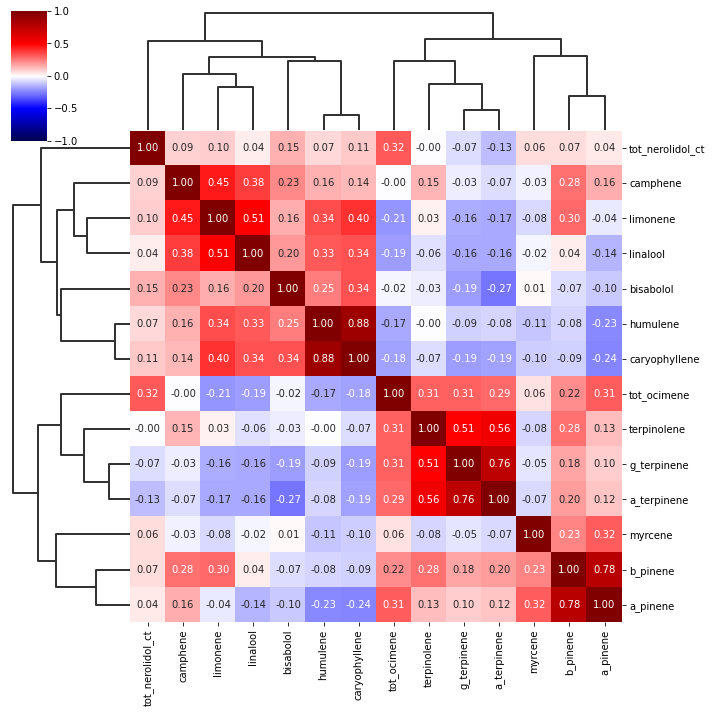

In [10]:
_df = lab_df[tot_terp_cols].corr(method='spearman')#.fillna(0)

# _mask = np.zeros(_df.shape, bool)
# np.fill_diagonal(_mask, True)

g = sb.clustermap(_df,
                  cmap='seismic',
                  vmin=-1,
                  vmax=1,
                  center=0,
                  annot=True,
                  fmt='.2f',
                  tree_kws={'linewidth':2}
             )

# g.ax_heatmap.set_xticklabels(['CBD','THC','CBG','THCV','CBC','CBN'],fontsize=15)
# g.ax_heatmap.set_yticklabels(['CBD','THC','CBG','THCV','CBC','CBN'],fontsize=15)

plt.savefig('clustermap_terpenes.png',dpi=300)
plt.savefig('clustermap_terpenes.eps',dpi=300)
plt.savefig('clustermap_terpenes.pdf',dpi=300)

In [11]:
annot_d = {}
for _i,r in enumerate(g.ax_heatmap.get_xticklabels()):
    _r = r.get_text()
    for _j,c in enumerate(g.ax_heatmap.get_yticklabels()):
        _c = c.get_text()
        if _r != _c:
            _df = lab_df[[_r,_c]].dropna(how='any')
            _corr,_p = stats.spearmanr(_df[_r],_df[_c])
            if _p < (0.001)/14:
                annot_d[(_r,_c)] = float('{:.2f}'.format(_corr))
            else:
                annot_d[(_r,_c)] = np.nan
                
annot_df = pd.DataFrame(annot_d.values(),index=annot_d.keys())[0].unstack(0)
annot_order = [i.get_text() for i in g.ax_heatmap.get_xticklabels()]
annot_df = annot_df.loc[annot_order,annot_order]
annot_df

,tot_nerolidol_ct,camphene,limonene,linalool,bisabolol,humulene,caryophyllene,tot_ocimene,terpinolene,g_terpinene,a_terpinene,myrcene,b_pinene,a_pinene
tot_nerolidol_ct,NaN,0.09,0.10,0.04,0.15,0.07,0.11,0.32,NaN,-0.07,-0.13,0.06,0.07,0.04
camphene,0.09,NaN,0.45,0.38,0.23,0.16,0.14,NaN,0.15,-0.03,-0.07,-0.03,0.28,0.16
limonene,0.10,0.45,NaN,0.51,0.16,0.34,0.40,-0.21,0.03,-0.16,-0.17,-0.08,0.30,-0.04
linalool,0.04,0.38,0.51,NaN,0.20,0.33,0.34,-0.19,-0.06,-0.16,-0.16,-0.02,0.04,-0.14
bisabolol,0.15,0.23,0.16,0.20,NaN,0.25,0.34,-0.02,-0.03,-0.19,-0.27,NaN,-0.07,-0.10
humulene,0.07,0.16,0.34,0.33,0.25,NaN,0.88,-0.17,NaN,-0.09,-0.08,-0.11,-0.08,-0.23
caryophyllene,0.11,0.14,0.40,0.34,0.34,0.88,NaN,-0.18,-0.07,-0.19,-0.19,-0.10,-0.09,-0.24
tot_ocimene,0.32,NaN,-0.21,-0.19,-0.02,-0.17,-0.18,NaN,0.31,0.31,0.29,0.06,0.22,0.31
terpinolene,NaN,0.15,0.03,-0.06,-0.03,NaN,-0.07,0.31,NaN,0.51,0.56,-0.08,0.28,0.13
g_terpinene,-0.07,-0.03,-0.16,-0.16,-0.19,-0.09,-0.19,0.31,0.51,NaN,0.76,-0.05,0.18,0.10


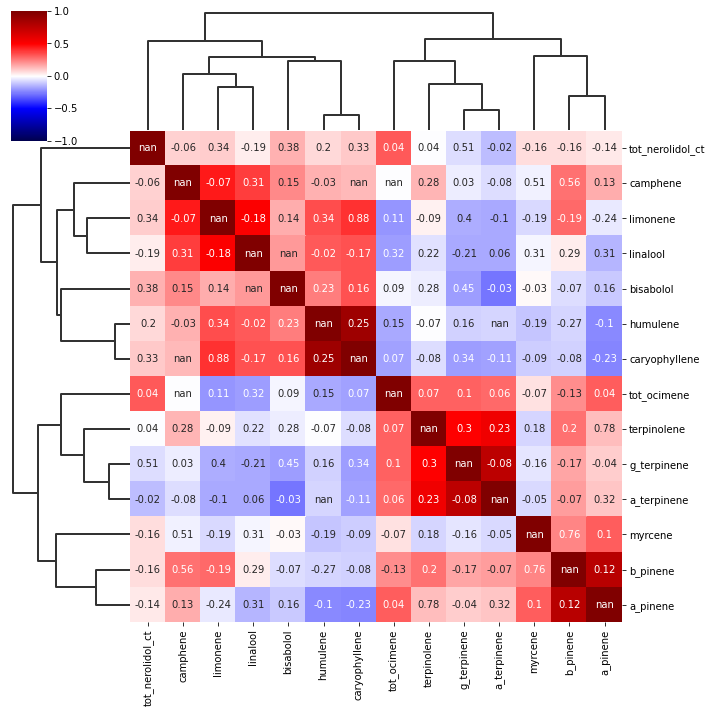

In [57]:
_df = lab_df[tot_terp_cols].corr(method='spearman')#.fillna(0)

# _mask = np.zeros(_df.shape, bool)
# np.fill_diagonal(_mask, True)

g = sb.clustermap(_df,
                  cmap='seismic',
                  vmin=-1,
                  vmax=1,
                  center=0,
                  annot=annot_df.values,
#                   fmt='.2f',
#                   mask=_mask,
                  tree_kws={'linewidth':2}
             )

# g.ax_heatmap.set_xticklabels(['CBD','THC','CBG','THCV','CBC','CBN'],fontsize=15)
# g.ax_heatmap.set_yticklabels(['CBD','THC','CBG','THCV','CBC','CBN'],fontsize=15)

plt.savefig('clustermap_terpenes_NaN.png',dpi=300)
plt.savefig('clustermap_terpenes_NaN.eps',dpi=300)
plt.savefig('clustermap_terpenes_NaN.pdf',dpi=300)

### Networks

Correlated.

In [52]:
_df = lab_df[tot_terp_cols].corr(method='spearman').fillna(0).values
terpene_g = nx.from_numpy_matrix(_df,
                                 create_using=nx.Graph)

terpene_gc = terpene_g.copy()

for i,j,d in terpene_g.edges(data=True):
    if i == j:
        terpene_gc.remove_edge(i,j)
    elif d['weight'] <= .10:
        terpene_gc.remove_edge(i,j)

terpene_gc.remove_nodes_from(list(nx.isolates(terpene_gc)))
print(terpene_gc.number_of_nodes(),terpene_gc.number_of_edges())

pos = nx.layout.rescale_layout_dict(nx.layout.spring_layout(terpene_gc,iterations=1000),1.3)

14 38


In [53]:
deg = nx.degree(terpene_gc)
label_map = {_p:tot_terp_cols[_p] for _p in terpene_gc.nodes()}

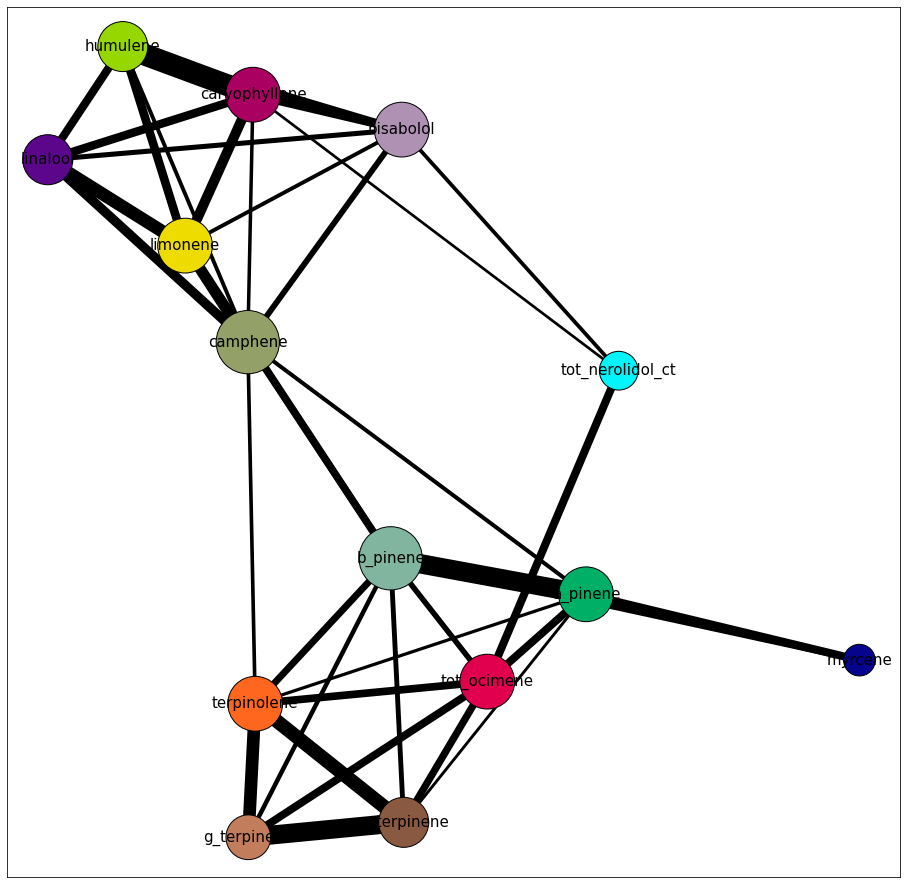

In [54]:
f,ax = plt.subplots(figsize=(16, 16))

terp_colors_ordered = [terp_colors[label_map[n]] for n in terpene_gc.nodes()]

nx.draw_networkx_edges(terpene_gc, 
                       pos,
                       width = [d['weight']*25 for i,j,d in terpene_gc.edges(data=True)],
                       ax=ax
                      )

nx.draw_networkx_nodes(terpene_gc,
                       pos,
                       node_size=[v*500 for v in dict(deg).values()],
                       edgecolors='k',
                       node_color=terp_colors_ordered,
                       ax=ax
                      )

nx.draw_networkx_labels(terpene_gc,
                        pos,
                        labels=label_map,
                        font_size=15,
                        ax=ax
                       )

plt.savefig('network_terpene.png',dpi=300)
plt.savefig('network_terpene.eps',dpi=300)
plt.savefig('network_terpene.pdf',dpi=300);

Anti-correlated.

In [55]:
_df = lab_df[tot_terp_cols].corr(method='spearman').fillna(0).values
terpene_g = nx.from_numpy_matrix(_df,
                                 create_using=nx.Graph)

terpene_gc_anti = terpene_g.copy()

for i,j,d in terpene_g.edges(data=True):
    if i == j:
        terpene_gc_anti.remove_edge(i,j)
    elif d['weight'] > -.1:
        terpene_gc_anti.remove_edge(i,j)

terpene_gc_anti.remove_nodes_from(list(nx.isolates(terpene_gc_anti)))
print(terpene_gc_anti.number_of_nodes(),terpene_gc_anti.number_of_edges())

pos_anti = nx.layout.rescale_layout_dict(nx.layout.spring_layout(terpene_gc_anti,iterations=100),1.3)


11 18


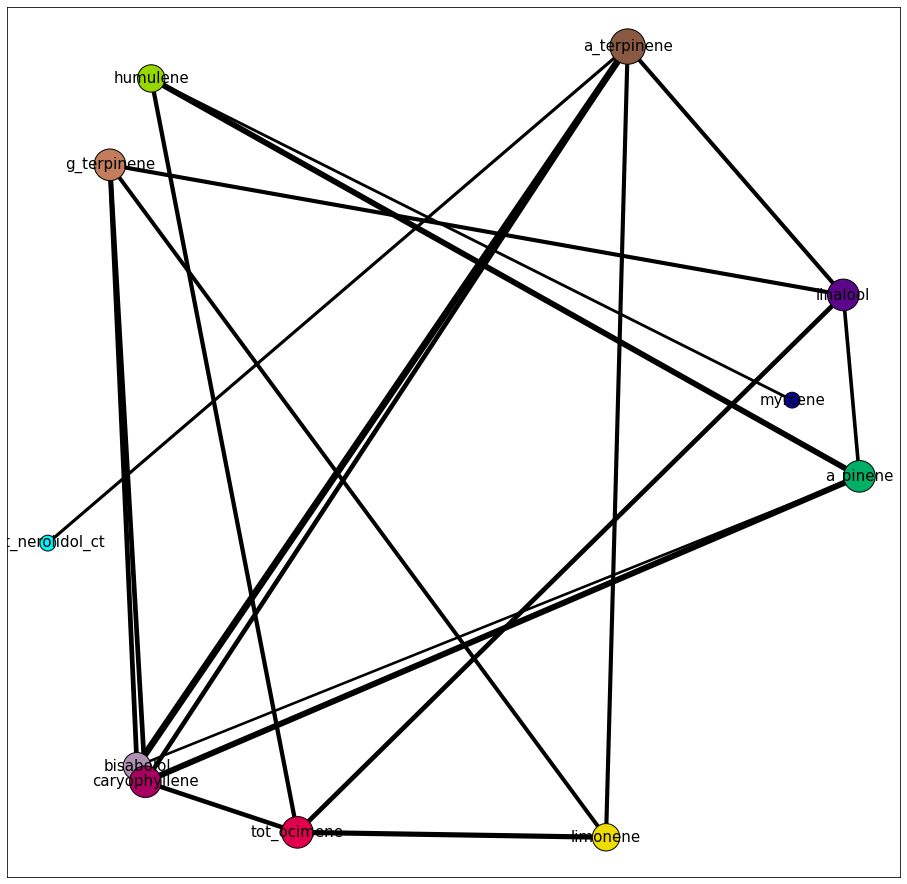

In [56]:
f,ax = plt.subplots(figsize=(16, 16))

terp_colors_ordered = [terp_colors[label_map[n]] for n in terpene_gc_anti.nodes()]

deg = nx.degree(terpene_gc_anti)
label_map = {_p:tot_terp_cols[_p] for _p in terpene_gc_anti.nodes()}

nx.draw_networkx_edges(terpene_gc_anti, 
                       pos_anti,
                       width = [d['weight']*25 for i,j,d in terpene_gc_anti.edges(data=True)],
                       ax=ax
                      )

nx.draw_networkx_nodes(terpene_gc_anti,
                       pos_anti,
                       node_size=[v*250 for v in dict(deg).values()],
                       edgecolors='k',
                       node_color=terp_colors_ordered,
                       ax=ax
                      )

nx.draw_networkx_labels(terpene_gc_anti,
                        pos_anti,
                        labels=label_map,
                        font_size=15,
                        ax=ax
                       )

plt.savefig('network_terpene_anti.png',dpi=300)
plt.savefig('network_terpene_anti.eps',dpi=300)
plt.savefig('network_terpene_anti.pdf',dpi=300);

## Reproducing PCA scatterplot

In [14]:
norm_lab_df.head()

,u_id,lab_id,dump_no,sample_id,orig_name,strain_slug,test_date,anon_producer,region,product_category,chemotype,cannab_var,ol_cannab_var_MAD,ol_cannab_var_low,ol_cannab_main_MAD,ol_cannab_minor_MAD,tot_thc,tot_cbd,tot_cbg,tot_cbc,tot_cbn,tot_cbdv,tot_cbt,tot_d8_thc,tot_thcv,has_terps,total_terps,terp_var,top_terp,top_terp_f,tot_ocimene,camphene,g_terpinene,tot_nerolidol_ct,humulene,caryophyllene,limonene,linalool,myrcene,bisabolol,b_pinene,a_terpinene,terpinolene,a_pinene,a_cedrene,a_ocimene,a_phellandrene,a_terpineol,b_nerolidol,b_ocimene,borneol,camphor,carene,caryophyllene_oxide,cedrol,cis_nerolidol,cis_ocimene,cis_phytol,citronellol,eucalyptol,farnesene,fenchol,fenchone,fenchyl_alcohol,g_terpineol,geraniol,geranyl_acetate,guaiol,iso_borneol,iso_pulegol,menthol,nerol,nerolidol,ocimene,p_cymene,phytol,pulegone,sabinene,sabinene_hydrate,terpineol,thymol,trans_nerolidol,trans_ocimene,trans_phytol,valencene,strain_category,strain_popularity,0,1,2,kmeans_label
0,0,canntest,1,0,1080,NaN,2018-05-24,255_canntest,AK,FLOWER,THC-Dom,48.478463,False,False,False,False,20.103098,0.047210,1.097430,0.000000,0.0,NaN,NaN,0.0,0.255775,True,2.042793,0.020911,caryophyllene,caryophyllene,12.662660,0.504063,0.772360,0.504063,10.939076,28.261919,8.024423,1.652116,8.925542,1.491895,5.759003,0.504063,16.196055,3.802760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.0,NaN,NaN,0.010000,0.251212,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-15.026038,15.332007,-11.847549,A
1,1,canntest,1,1,1080,NaN,2018-08-28,255_canntest,AK,FLOWER,THC-Dom,37.994079,False,False,False,False,17.775078,0.085711,0.904467,0.046734,0.0,NaN,NaN,0.0,0.050000,True,1.802569,0.015647,tot_ocimene,tot_ocimene,21.573197,0.575805,0.868247,1.279186,8.256073,18.156638,7.324038,0.575805,11.502369,0.575805,4.022542,0.733066,21.049403,3.507825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN,0.0,NaN,NaN,0.022216,0.374661,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-8.260186,24.085677,-5.876016,C
2,2,canntest,1,2,1080,NaN,2018-08-28,255_canntest,AK,FLOWER,THC-Dom,39.821353,False,False,False,False,18.196924,0.079075,0.923358,0.056123,0.0,NaN,NaN,0.0,0.050000,True,1.657769,0.013292,terpinolene,terpinolene,20.818946,0.621992,0.814187,1.662612,8.730714,19.036137,6.908567,1.372195,11.044578,0.621992,3.600342,0.745225,20.950313,3.072201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN,0.0,NaN,NaN,0.026730,0.334714,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-9.068601,23.655458,-6.793898,C
3,3,canntest,1,3,1080,NaN,2018-09-07,255_canntest,AK,FLOWER,THC-Dom,45.132592,False,False,False,False,19.302718,0.059964,0.517679,0.034465,0.0,NaN,NaN,0.0,0.050000,True,1.247020,0.013983,caryophyllene,caryophyllene,0.801912,0.801912,0.801912,0.000000,13.442350,30.898123,10.815553,4.494519,29.554248,3.917273,2.863738,0.000000,0.000000,1.608460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.0,NaN,NaN,0.000000,0.010000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-0.266095,-8.519286,-13.435915,A
4,4,canntest,1,4,1080,NaN,2018-12-07,255_canntest,AK,FLOWER,THC-Dom,39.832131,False,False,False,False,18.224250,0.071973,0.966903,0.000000,0.0,NaN,NaN,0.0,0.231606,True,1.262112,0.006794,caryophyllene,caryophyllene,12.974428,0.817678,1.145827,0.817678,10.433612,25.984759,9.490993,2.399899,8.129213,0.817678,6.839238,0.817678,14.716595,4.614722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN,0.0,NaN,NaN,0.010000,0.158674,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-15.125999,14.833775,-8.813624,A


In [20]:
norm_lab_df['kmeans_label'].value_counts()

A    21811
B    14188
C     5202
Name: kmeans_label, dtype: int64

In [27]:
pca_cluster_colors = {'C': '#ff671f', 'A': '#aa0061', 'B': '#06038d'}#, 'D': '#00f6fa'}
labels = norm_lab_df['kmeans_label'].unique()

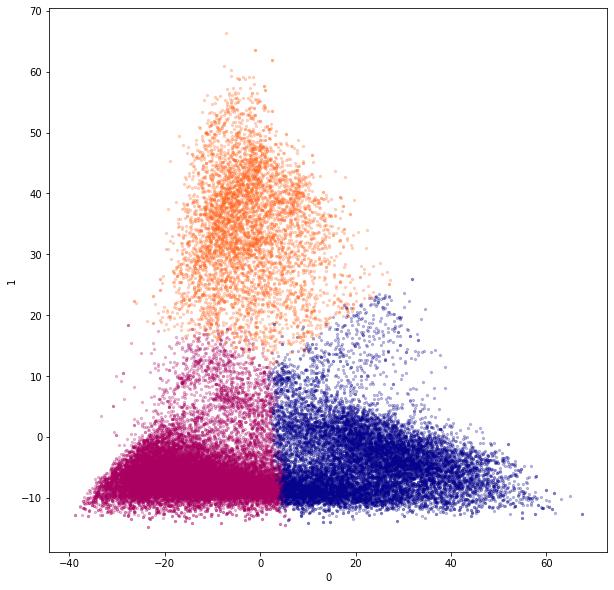

In [16]:
f,ax = plt.subplots(figsize=(10,10))
for label in norm_lab_df['kmeans_label'].unique():
    _df = norm_lab_df[norm_lab_df['kmeans_label']==label]
    _df.plot.scatter(x='0',y='1',c=pca_cluster_colors[label],s=5,ax=ax,alpha=.25)

## Figure 7

UMAP embedding with k-means cluster labels.

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_cann = norm_lab_df[tot_can_cols].fillna(0)
X_cann_standard = MinMaxScaler().fit_transform(X_cann)

X_terps = norm_lab_df[tot_terp_cols].fillna(0)
# X_terps_standard = MinMaxScaler().fit_transform(X_terps)

X_all = norm_lab_df[tot_can_cols+tot_terp_cols].fillna(0)
X_all_standard = MinMaxScaler().fit_transform(X_all)

In [18]:
# Step 1: Choose your model class(es)
from umap import UMAP

# Step 2: Instantiate your model class(es)
umap_ = UMAP(n_components=2, n_neighbors=10, random_state=42)

# Step 3: Arrange data into features matrices


# Step 4: Fit the data and transform
# X_cann_umap = umap_.fit_transform(X_cann_standard)
X_terps_umap = umap_.fit_transform(X_terps)
# X_all_umap = umap_.fit_transform(X_all_standard)

Make colors.

In [21]:
terp_colors_plot = []
for c in norm_lab_df['top_terp_f'].tolist():
    terp_colors_plot.append(terp_colors[c])
    
pca_colors_plot = []
for c in norm_lab_df['kmeans_label'].tolist():
    pca_colors_plot.append(pca_cluster_colors[c])

Make legends.

In [22]:
top_terps = pd.DataFrame({'Count':norm_lab_df['top_terp_f'].value_counts(),
                          'Color':terp_colors})

top_terps_d = top_terps.sort_values('Count',ascending=False).to_dict('index')

top_terps_d

{'myrcene': {'Count': 15670, 'Color': '#06038d'},
 'caryophyllene': {'Count': 10534, 'Color': '#aa0061'},
 'limonene': {'Count': 7662, 'Color': '#eedc00'},
 'terpinolene': {'Count': 4123, 'Color': '#ff671f'},
 'a_pinene': {'Count': 1161, 'Color': '#00af66'},
 'other': {'Count': 918, 'Color': '#8a8a8a'},
 'tot_ocimene': {'Count': 399, 'Color': '#e0004d'},
 'linalool': {'Count': 279, 'Color': '#5c068c'},
 'a_terpinene': {'Count': 234, 'Color': '#8a5942'},
 'tot_nerolidol_ct': {'Count': 101, 'Color': '#00f6fa'},
 'humulene': {'Count': 61, 'Color': '#97d700'},
 'bisabolol': {'Count': 27, 'Color': '#af91b3'},
 'b_pinene': {'Count': 14, 'Color': '#81b59f'},
 'camphene': {'Count': 9, 'Color': '#93a168'},
 'g_terpinene': {'Count': 9, 'Color': '#c27d5d'}}

In [28]:
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

terp_legend_patches = []
for label, _d in top_terps_d.items():
#     terp_legend_patches.append(Circle([], color=color, label=label))
    terp_legend_patches.append(Line2D([0], [0], 
                                      marker = 'o', 
                                      color = _d['Color'], 
                                      linestyle = 'None', 
                                      label = "{0}\n(n={1:,.0f})".format(label,_d['Count'])))
    
terp_legend_top5_patches = []
for i, (label, _d) in enumerate(top_terps_d.items()):
    if i < 5:
        terp_legend_top5_patches.append(Line2D([0], [0], 
                                      marker = 'o', 
                                      color = _d['Color'], 
                                      linestyle = 'None', 
                                      label = "{0}\n(n={1:,.0f})".format(label,_d['Count'])))
      

cluster_legend_patches = []
for label,color in sorted(pca_cluster_colors.items(), key=lambda x:x[0]):
    cluster_legend_patches.append(Line2D([0], [0], 
                                         marker='o', 
                                         color=color, 
                                         linestyle='None', 
                                         label=label))

Terpenes only.

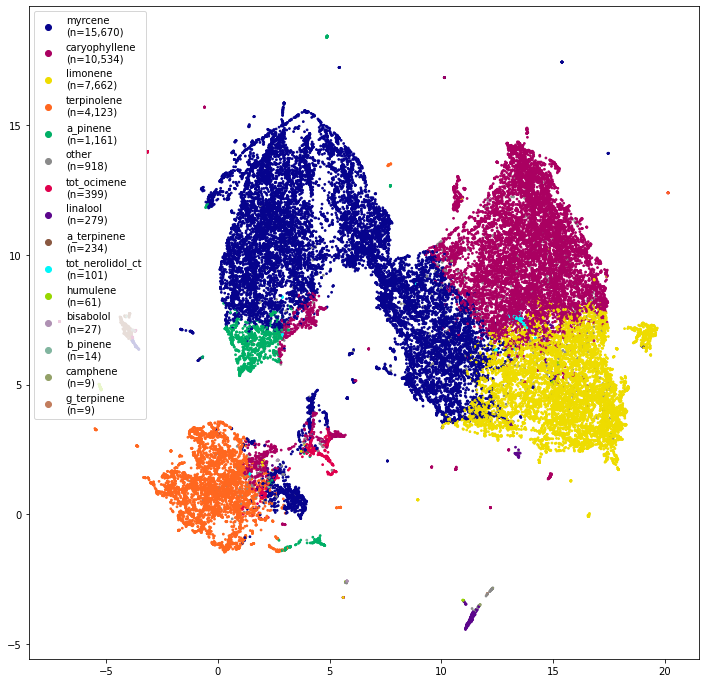

In [24]:
f,ax = plt.subplots(1,1,figsize=(12,12))
ax.scatter(X_terps_umap[:,0],X_terps_umap[:,1],s=3,c=terp_colors_plot)
ax.legend(handles=terp_legend_patches,loc='upper left')

plt.savefig('umap_terp_embed_terp_color.png',dpi=300)
# plt.savefig('umap_terp_embed_terp_color.eps',dpi=300)
plt.savefig('umap_terp_embed_terp_color.pdf',dpi=300);

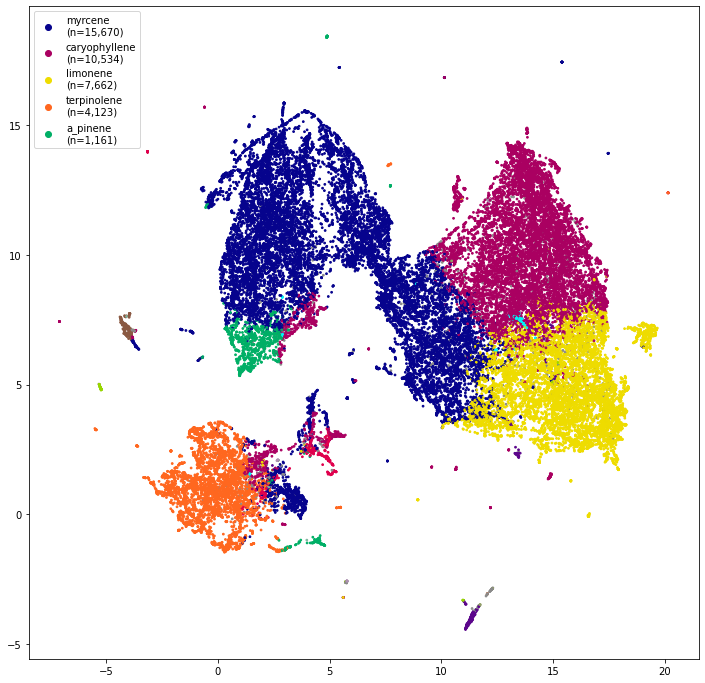

In [25]:
f,ax = plt.subplots(1,1,figsize=(12,12))
ax.scatter(X_terps_umap[:,0],X_terps_umap[:,1],s=3,c=terp_colors_plot)
ax.legend(handles=terp_legend_top5_patches,loc='upper left')

plt.savefig('umap_terp_embed_top5_terp_color.png',dpi=300)
# plt.savefig('umap_terp_embed_top5_terp_color.eps',dpi=300)
plt.savefig('umap_terp_embed_top5_terp_color.pdf',dpi=300);

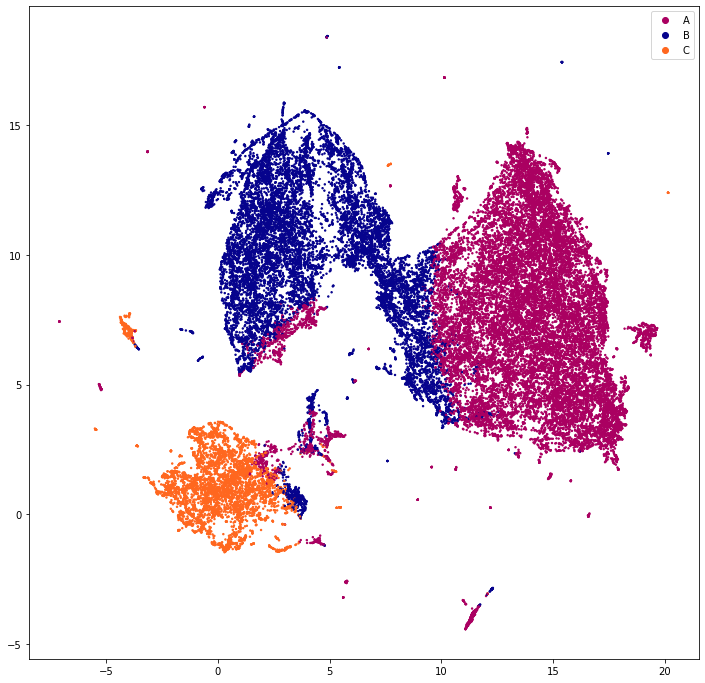

In [30]:
f,ax = plt.subplots(1,1,figsize=(12,12))
ax.scatter(X_terps_umap[:,0],X_terps_umap[:,1],s=2,c=pca_colors_plot)

labels_n = [(cat, norm_lab_df.loc[norm_lab_df['kmeans_label']==cat].shape[0]) for cat in ['A','B','C','D']]
labels = [cat+'\nn='+str(n) for cat, n in labels_n]
# handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=cluster_legend_patches)

plt.savefig('umap_terp_embed_kmeans_color.png',dpi=300)
# plt.savefig('umap_terp_embed_kmeans_color.eps',dpi=300)
plt.savefig('umap_terp_embed_kmeans_color.pdf',dpi=300);